# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Rare Sneaker Prices


**Harvard University**<br/>
**Fall 2021**<br/>
**Students**: Tyler Barnett, Weston Ruths, Pragya Tooteja, Kishan Venkataramu

<hr style="height:2pt">



In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.utils import resample

from pandas.plotting import scatter_matrix

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)

  
  

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

In [3]:
data = pd.read_csv("data/StockX-Data.csv")
np.random.seed(121)

# Convert dates to ordinals
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'] = data['Order Date'].map(dt.datetime.toordinal)

data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Release Date'] = data['Release Date'].map(dt.datetime.toordinal)

# Process categorical variables
categorical_columns = ['Brand', 'Buyer Region']
for column in categorical_columns:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
        left=data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )

# Data cleaning
data['Sale Price']= data['Sale Price'].str.replace(',', '')
data['Sale Price']= data['Sale Price'].str.replace('$','')
data['Sale Price']= data['Sale Price'].astype(float)

data['Retail Price']= data['Retail Price'].str.replace(',', '')
data['Retail Price']= data['Retail Price'].str.replace('$','')
data['Retail Price']= data['Retail Price'].astype(float)

# Split dataset
data_train, data_test = train_test_split(
    data,
    test_size=0.2,
    random_state=121,
    shuffle=True,
)

print(data.shape)
print(data_train.shape, data_test.shape)

(99956, 61)
(79964, 61) (19992, 61)


/var/folders/7w/dkjvv8f57hv2qg30psq105jr0000gn/T/ipykernel_18464/1921369112.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Sale Price']= data['Sale Price'].str.replace('$','')
/var/folders/7w/dkjvv8f57hv2qg30psq105jr0000gn/T/ipykernel_18464/1921369112.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Retail Price']= data['Retail Price'].str.replace('$','')


In [4]:
data.dtypes

Order Date                             int64
Brand                                 object
Sneaker Name                          object
Sale Price                           float64
Retail Price                         float64
Release Date                           int64
Shoe Size                            float64
Buyer Region                          object
Brand_ Yeezy                           uint8
Brand_Off-White                        uint8
Buyer Region_Alabama                   uint8
Buyer Region_Alaska                    uint8
Buyer Region_Arizona                   uint8
Buyer Region_Arkansas                  uint8
Buyer Region_California                uint8
Buyer Region_Colorado                  uint8
Buyer Region_Connecticut               uint8
Buyer Region_Delaware                  uint8
Buyer Region_District of Columbia      uint8
Buyer Region_Florida                   uint8
Buyer Region_Georgia                   uint8
Buyer Region_Hawaii                    uint8
Buyer Regi

In [5]:
# unique values in each columns
for x in data.columns:
    #prinfting unique values
    print(x ,':', len(data[x].unique()))

Order Date : 531
Brand : 2
Sneaker Name : 50
Sale Price : 1489
Retail Price : 8
Release Date : 35
Shoe Size : 26
Buyer Region : 51
Brand_ Yeezy : 2
Brand_Off-White : 2
Buyer Region_Alabama : 2
Buyer Region_Alaska : 2
Buyer Region_Arizona : 2
Buyer Region_Arkansas : 2
Buyer Region_California : 2
Buyer Region_Colorado : 2
Buyer Region_Connecticut : 2
Buyer Region_Delaware : 2
Buyer Region_District of Columbia : 2
Buyer Region_Florida : 2
Buyer Region_Georgia : 2
Buyer Region_Hawaii : 2
Buyer Region_Idaho : 2
Buyer Region_Illinois : 2
Buyer Region_Indiana : 2
Buyer Region_Iowa : 2
Buyer Region_Kansas : 2
Buyer Region_Kentucky : 2
Buyer Region_Louisiana : 2
Buyer Region_Maine : 2
Buyer Region_Maryland : 2
Buyer Region_Massachusetts : 2
Buyer Region_Michigan : 2
Buyer Region_Minnesota : 2
Buyer Region_Mississippi : 2
Buyer Region_Missouri : 2
Buyer Region_Montana : 2
Buyer Region_Nebraska : 2
Buyer Region_Nevada : 2
Buyer Region_New Hampshire : 2
Buyer Region_New Jersey : 2
Buyer Region_New

In [6]:
data_train.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Brand_ Yeezy,Brand_Off-White,Buyer Region_Alabama,Buyer Region_Alaska,Buyer Region_Arizona,Buyer Region_Arkansas,Buyer Region_California,Buyer Region_Colorado,Buyer Region_Connecticut,Buyer Region_Delaware,Buyer Region_District of Columbia,Buyer Region_Florida,Buyer Region_Georgia,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,...,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
63326,737019,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,325.0,220.0,737021,12.5,California,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80294,737054,Off-White,Nike-Air-Force-1-Low-Off-White-Volt,374.0,170.0,737047,9.0,California,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85113,737062,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,399.0,220.0,737054,8.5,Massachusetts,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43216,736915,Off-White,Nike-Air-Presto-Off-White-White-2018,657.0,160.0,736909,10.0,Texas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96466,737096,Yeezy,adidas-Yeezy-Boost-350-V2-Static,330.0,220.0,737055,7.0,New York,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:xlabel='Order Date', ylabel='Order Date'>,
        <AxesSubplot:xlabel='Sale Price', ylabel='Order Date'>,
        <AxesSubplot:xlabel='Retail Price', ylabel='Order Date'>,
        <AxesSubplot:xlabel='Release Date', ylabel='Order Date'>,
        <AxesSubplot:xlabel='Shoe Size', ylabel='Order Date'>],
       [<AxesSubplot:xlabel='Order Date', ylabel='Sale Price'>,
        <AxesSubplot:xlabel='Sale Price', ylabel='Sale Price'>,
        <AxesSubplot:xlabel='Retail Price', ylabel='Sale Price'>,
        <AxesSubplot:xlabel='Release Date', ylabel='Sale Price'>,
        <AxesSubplot:xlabel='Shoe Size', ylabel='Sale Price'>],
       [<AxesSubplot:xlabel='Order Date', ylabel='Retail Price'>,
        <AxesSubplot:xlabel='Sale Price', ylabel='Retail Price'>,
        <AxesSubplot:xlabel='Retail Price', ylabel='Retail Price'>,
        <AxesSubplot:xlabel='Release Date', ylabel='Retail Price'>,
        <AxesSubplot:xlabel='Shoe Size', ylabel='Retail Price'>],
       [<AxesSubpl

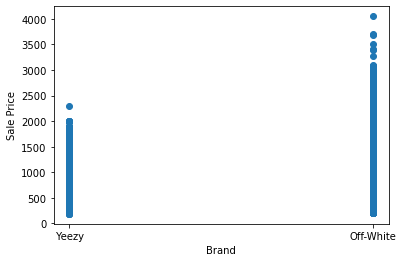

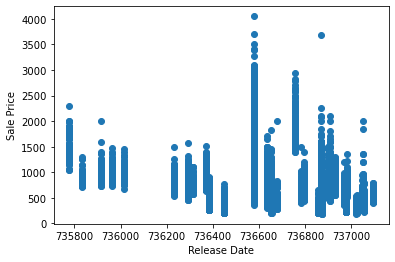

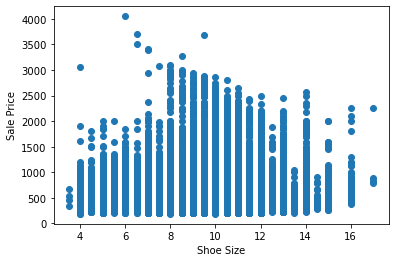

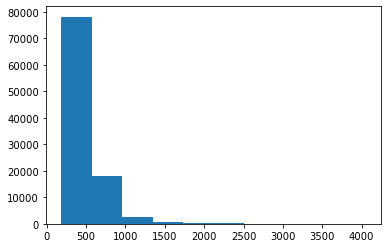

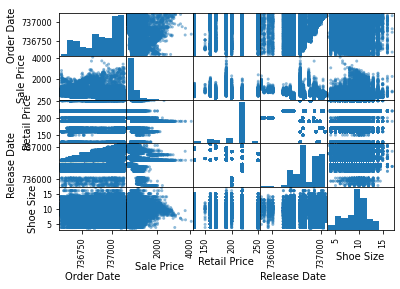

In [7]:
attr_list = [
    "Order Date",
    "Brand",
    "Sneaker Name",
    "Sale Price",
    "Retail Price",
    "Release Date",
    "Shoe Size",
    "Buyer Region"
]

plt.scatter(data['Brand'], data['Sale Price'])
plt.xlabel('Brand')
plt.ylabel('Sale Price')

plt.figure()

plt.scatter(data['Release Date'], data['Sale Price'])
plt.xlabel('Release Date')
plt.ylabel('Sale Price')

plt.figure()
plt.scatter(data['Shoe Size'], data['Sale Price'])
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price')

plt.figure()
plt.hist(data['Sale Price'])

scatter_matrix(data[attr_list])

Text(0.5, 1.0, 'Average Sale Price for Release Date')

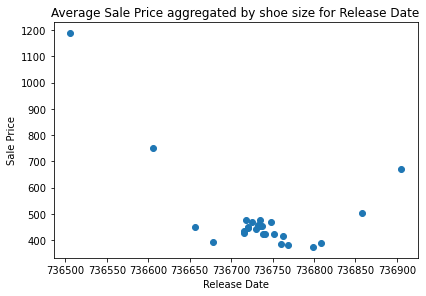

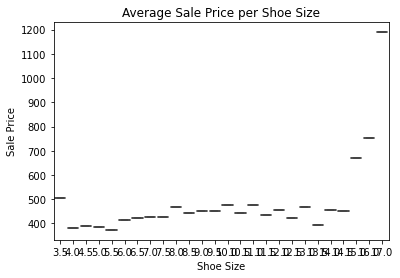

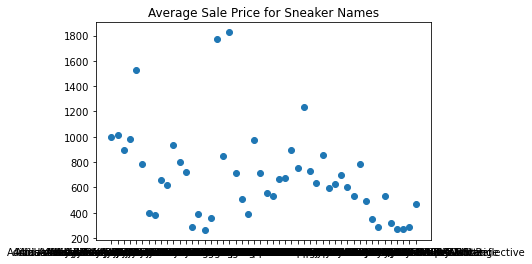

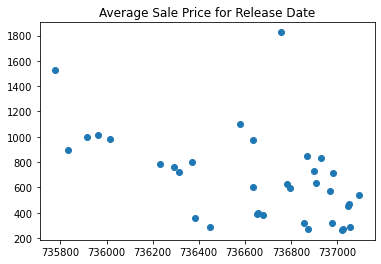

In [8]:
#Aggregating by Shoe Size
data1= data.groupby(by= ['Shoe Size']).mean()
plt.scatter(data1['Release Date'], data1['Sale Price'])
plt.xlabel('Release Date')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.title('Average Sale Price aggregated by shoe size for Release Date')
plt.figure()
sns.boxplot(x=data1.index, y=data1['Sale Price'])
plt.title('Average Sale Price per Shoe Size')

plt.figure()

data2= data.groupby(by= ['Release Date']).mean()
data3= data.groupby(by= ['Sneaker Name']).mean()
plt.scatter(data3.index, data3['Sale Price'])
plt.title('Average Sale Price for Sneaker Names')

plt.figure()

#Add Average Sale Price of Sneaker Name 
#Number of Sneaker Sales by Shoe Size
#Number of Sneakers by Sneaker Name


plt.scatter(data2.index, data2['Sale Price'])
plt.title('Average Sale Price for Release Date')
#plt.setp(plt.get_xticklabels(), rotation=30, horizontalalignment='right')
#sns.tight_layout()

<a id="intro"></a>

## Baseline Model

[Return to contents](#contents)

In [9]:
# Split dataframe into X and y numpy arrays
X_train = data_train.loc[:, ~data_train.columns.isin(['Sale Price', 'Brand', 'Sneaker Name', 'Buyer Region'])].values
y_train = data_train["Sale Price"].values
X_test = data_test.loc[:, ~data_test.columns.isin(['Sale Price', 'Brand', 'Sneaker Name', 'Buyer Region'])].values
y_test = data_test["Sale Price"].values

In [11]:
train_scores = {}
cvmeans = {}
cvstds = {}

tree_depth_start, tree_depth_end = 1, 20
for i in range(tree_depth_start, tree_depth_end + 1):
    
    #declare tree model object
    model = DecisionTreeRegressor(max_depth=i)
    
    #fit the decision tree to the entire training set
    model.fit(X_train, y_train)
    
    #Evaluate on the entire training set (i.e., .score(...)), while storing the scores in a variable named train_scores.
    train_scores[i] = model.score(X_train, y_train)
    
    #get cv metrics
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
    cvmeans[i] = scores.mean()
    cvstds[i] = np.std(scores)

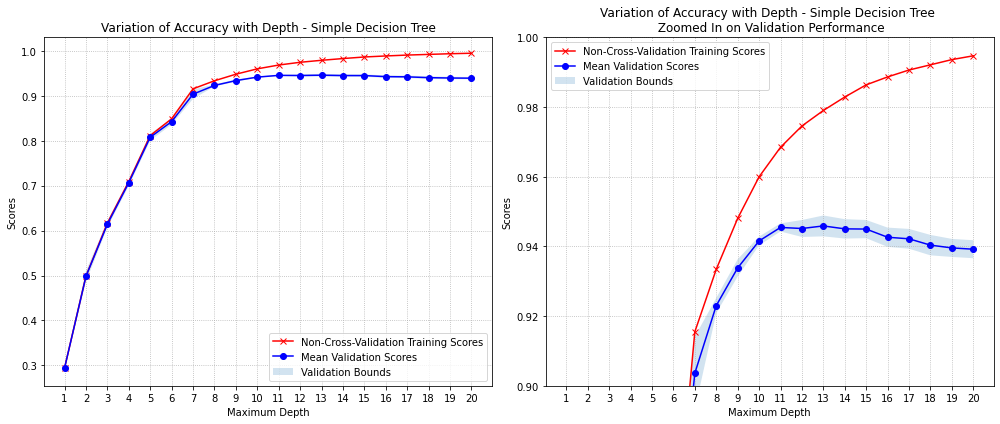

In [14]:
#Plot helpers
lists_train_scores = sorted(train_scores.items())
x_train_scores, y_train_scores = zip(*lists_train_scores)   

lists_cvmeans = sorted(cvmeans.items())
x_cvmeans, y_cvmeans = zip(*lists_cvmeans)   

stds = np.array([ scores for scores in cvstds.values() ])

#Plot
f, axes = plt.subplots(1,2, figsize=(14,6))

axes[0].plot(x_train_scores, y_train_scores, 'r-', marker='x', label="Non-Cross-Validation Training Scores")
axes[0].plot(x_cvmeans, y_cvmeans, 'b-', marker='o', label="Mean Validation Scores")
axes[0].fill_between(x_cvmeans, y_cvmeans + stds, y_cvmeans - stds, alpha=0.2, label="Validation Bounds")
axes[0].legend()
axes[0].set_title('Variation of Accuracy with Depth - Simple Decision Tree')
axes[0].set_ylabel("Scores")
axes[0].set_xlabel("Maximum Depth")
axes[0].set_xticks(x_train_scores)
axes[0].grid(ls=":")

axes[1].plot(x_train_scores, y_train_scores, 'r-', marker='x', label="Non-Cross-Validation Training Scores")
axes[1].plot(x_cvmeans, y_cvmeans, 'b-', marker='o', label="Mean Validation Scores")
axes[1].fill_between(x_cvmeans, y_cvmeans + stds, y_cvmeans - stds, alpha=0.2, label="Validation Bounds")
axes[1].legend()
axes[1].set_title('Variation of Accuracy with Depth - Simple Decision Tree \n Zoomed In on Validation Performance')
axes[1].set_ylabel("Scores")
axes[1].set_xlabel("Maximum Depth")
axes[1].set_ylim([min(cvmeans.values())-.02, max(cvmeans.values())+.02])
axes[1].set_ylim([0.9, 1.0])
axes[1].set_xticks(x_train_scores)
axes[1].grid(ls=":")

plt.tight_layout()
plt.show()

In [ ]:
#Find the best depth
best_depth = max(cvmeans, key=cvmeans.get)
print("The best depth is: ", best_depth)

#declare tree model object
model = DecisionTreeRegressor(max_depth=best_depth)

#fit the decision tree to the entire training set
model.fit(X_train, y_train)

best_cv_tree_train_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
best_cv_tree_test_score = cross_val_score(estimator=model, X=X_test, y=y_test, cv=5, n_jobs=-1)

print(f'The classification accuracy of the TRAIN set is: {best_cv_tree_train_score.mean():.4f}')
print(f'The classification accuracy of the TEST set is: {best_cv_tree_test_score.mean():.4f}')

The best depth is:  13


#### THE END

[Return to contents](#contents)